In [165]:
%run ~/work/PhD-utils/CST-tools.py
import matplotlib.pyplot as plt
%matplotlib inline

Version 0.1
Please report bugs to eugenio.senes@cern.ch
Use at your own risk.


In [154]:
fpath = '/Users/esenes/work/AWAKE-BPMs-tests/Simulations-analysis/proton_resolution/'

# time domain filenames
f_comp = ['port1.txt', 'port2.txt', 'port3.txt', 'port4.txt']

In [162]:
# scan the param space of a file
data, flags = read_CST_param_results(fpath+f_comp[0], verbose=False)

beam_x = []
beam_y = []
for k in range(len(data)):
    val = find_single_param(data[k],'beam_x', verbose=False)
    val is not np.nan and beam_x.append(val)
    val = find_single_param(data[k],'beam_y', verbose=False)
    val is not np.nan and beam_y.append(val)        

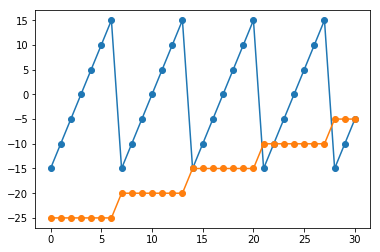

In [167]:
plt.plot(beam_y,'-o')
plt.plot(beam_x,'-o')

# Create a dataframe

In [182]:
data = create_empty_dataframe(param_values=range(len(beam_x)), column_names=['port1','port2','port3','port4'])
data['beam_x']=beam_x
data['beam_y']=beam_y

In [183]:
# fill up the dataframe
for f in f_comp:
    out, flag = read_CST_param_results(fpath+f, verbose=False)
    data[f.strip('.txt')] = out[flag]


In [185]:
data.head()

,port1,port2,port3,port4,beam_x,beam_y
0,"[[0.0, 0.0012740618549287, 0.0025481237098575,...","[[0.0, 0.0012740618549287, 0.0025481237098575,...","[[0.0, 0.0012740618549287, 0.0025481237098575,...","[[0.0, 0.0012740618549287, 0.0025481237098575,...",-25.0,-15.0
1,"[[0.0, 0.00077750463970006, 0.0015550092794001...","[[0.0, 0.00077750463970006, 0.0015550092794001...","[[0.0, 0.00077750463970006, 0.0015550092794001...","[[0.0, 0.00077750463970006, 0.0015550092794001...",-25.0,-10.0
2,"[[0.0, 0.00078661856241524, 0.0015732371248305...","[[0.0, 0.00078661856241524, 0.0015732371248305...","[[0.0, 0.00078661856241524, 0.0015732371248305...","[[0.0, 0.00078661856241524, 0.0015732371248305...",-25.0,-5.0
3,"[[0.0, 0.0007866186206229, 0.0015732372412458,...","[[0.0, 0.0007866186206229, 0.0015732372412458,...","[[0.0, 0.0007866186206229, 0.0015732372412458,...","[[0.0, 0.0007866186206229, 0.0015732372412458,...",-25.0,0.0
4,"[[0.0, 0.00078661856241524, 0.0015732371248305...","[[0.0, 0.00078661856241524, 0.0015732371248305...","[[0.0, 0.00078661856241524, 0.0015732371248305...","[[0.0, 0.00078661856241524, 0.0015732371248305...",-25.0,5.0


# Calculate delta/sigma

In [221]:
def delta_sigma(port1, port2):
    p1 = np.std(port1)
    p2 = np.std(port2)
    return (p1-p2)/(p1+p2)

In [225]:
data['delta_sigma'] = np.nan
for lab in data.index:
    data['delta_sigma'].loc[lab] = delta_sigma(data['port1'].loc[lab][1], data['port2'].loc[lab][1])

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


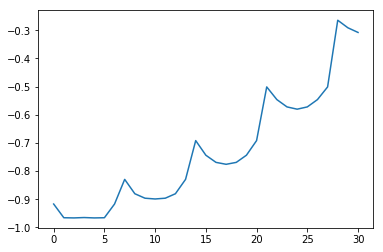

In [226]:
plt.plot(data['delta_sigma'])